<a href="https://colab.research.google.com/github/slowpoke000/machine-learning/blob/master/MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is the beginner for Tensorflow**

### MNIST dataset


MNIST is a collection of handwritten digits ranging from the number 0 to 9. It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels. In some literature, the term target or ground truth is also used to refer to the label.

In the preceding figure sample images of the MNIST digits, each being sized at 28 X 28-pixel grayscale, can be seen. To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically. Listing 1.3.1 demonstrates how to load the MNIST dataset in just one line, allowing us to both count the train and test labels and then plot random digit images.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical, plot_model


Load the MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


Count the number of unique train and test labels

In [ ]:
# count the number of unique train labels
# useful to check for class imbalance
unique_train, counts_train = np.unique(y_train, return_counts = True)
print("Train labels: ", dict(zip(unique_train, counts_train)))

# count the number of unique test labels
unique_test, counts_test = np.unique(y_test, return_counts = True)
print("Test labels: ", dict(zip(unique_test, counts_test)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Plotting new images to get an idea what it looks like


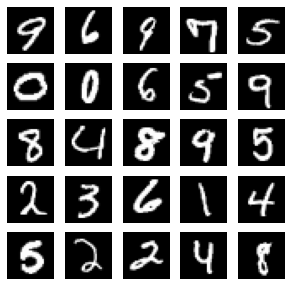

In [ ]:
# sample 25 minst digits
indexes = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indexes]
labels = y_train[indexes]

# Plot the 25 MNIST digits
plt.figure(figsize = (5,5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i + 1)
  image = images[i]
  plt.imshow(image, cmap = 'gray')
  plt.axis('off')

plt.show()
plt.savefig("mnist_samples.png")
plt.close('all')

Before discussing the multilayer perceptron classifier model, it is essential to keep in mind that while MNIST data are 2D tensors, they should be reshaped accordingly depending on the type of input layer. The following figure shows how a 3 × 3 grayscale image is reshaped for MLPs, CNNs, and RNNs input layers:

![picture](https://drive.google.com/uc?export=view&id=1P0RxkIPPlitwuZj6rhI4eWdDsYuORgY-)



Build the MLP model

In [ ]:
# determine the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
print(y_train.shape)
print(y_train[0:10])
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_labels)
# alternative using keras
#y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# image dimension 
x_image_size = x_train.shape[1]
y_image_size = x_train.shape[2]
print(x_image_size, y_image_size)
input_size = x_image_size * y_image_size
print(input_size)

28 28
784


In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32')/255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32')/255


In [ ]:
print(x_train.shape)

(60000, 784)


In [ ]:
# Network parameters
num_epochs = 20
num_batch_size = 128

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_dim = input_size, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.33, epochs = num_epochs, batch_size = num_batch_size)

Epoch 1/20
315/315 [==============================] - 2s 5ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0070 - val_accuracy: 0.9979
Epoch 2/20
315/315 [==============================] - 2s 5ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0105 - val_accuracy: 0.9968
Epoch 3/20
315/315 [==============================] - 1s 5ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0091 - val_accuracy: 0.9975
Epoch 4/20
315/315 [==============================] - 2s 5ms/step - loss: 0.0269 - accuracy: 0.9917 - val_loss: 0.0106 - val_accuracy: 0.9964
Epoch 5/20
315/315 [==============================] - 1s 4ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0129 - val_accuracy: 0.9962
Epoch 6/20
315/315 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0.9923 - val_loss: 0.0143 - val_accuracy: 0.9953
Epoch 7/20
315/315 [==============================] - 1s 4ms/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.0156 - val_accuracy: 0.9949
Epoch 

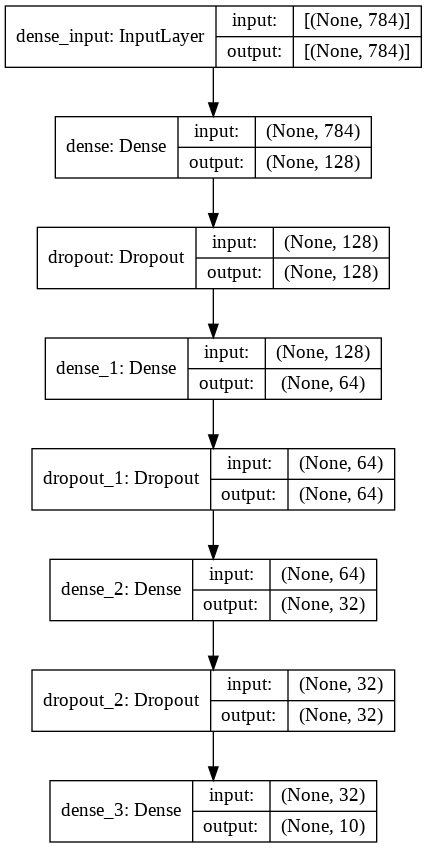

In [ ]:
plot_model(model, show_shapes = True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


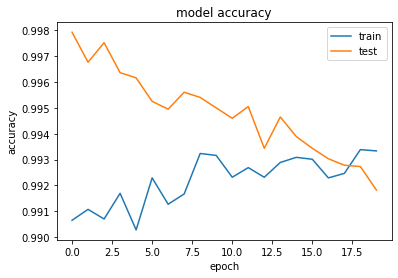

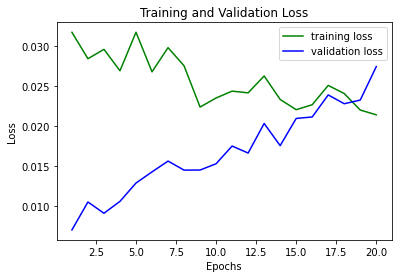

In [ ]:
# Graphing the history
print(history.history.keys())

# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, 'g', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()